In [3]:
import pandas as pd
df=pd.read_csv('default_of_credit_card_clients.csv')
import numpy as np

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.shape

(30000, 25)

In [7]:
df['ID'].nunique()

29687

In [8]:
id_counts = df['ID'].value_counts()
id_counts.head()

7c9b7473-cc2f    2
bae9475e-7cad    2
5f79f818-18af    2
ca3910f2-92ca    2
51e5ff58-5a0f    2
Name: ID, dtype: int64

In [9]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

In [10]:
np.random.seed(seed=24)
random_integers = np.random.randint(low=1,high=5,size=100)
is_equal_to_3 = random_integers == 3
is_equal_to_3[:5]
random_integers[is_equal_to_3]


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [11]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

7c9b7473-cc2f    True
bae9475e-7cad    True
5f79f818-18af    True
ca3910f2-92ca    True
51e5ff58-5a0f    True
Name: ID, dtype: bool

In [12]:
id_counts.index[0:5]


Index(['7c9b7473-cc2f', 'bae9475e-7cad', '5f79f818-18af', 'ca3910f2-92ca',
       '51e5ff58-5a0f'],
      dtype='object')

In [13]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [14]:
dupe_ids[0:5]


['7c9b7473-cc2f',
 'bae9475e-7cad',
 '5f79f818-18af',
 'ca3910f2-92ca',
 '51e5ff58-5a0f']

In [15]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10) 


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5998,5f79f818-18af,200000,1,3,2,33,0,0,0,0,...,119730,122537,109504,7100,5354,4363,4816,4381,3330,0
6098,5f79f818-18af,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8480,bae9475e-7cad,140000,2,1,2,30,0,0,0,0,...,6847,8075,8592,1200,1108,500,1500,650,0,0
8580,bae9475e-7cad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15879,7c9b7473-cc2f,90000,2,1,1,29,0,0,0,0,...,27751,20292,14937,2967,2007,1429,1092,412,263,0
15979,7c9b7473-cc2f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_zero_mask = df == 0
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)
df_clean_1 = df.loc[~feature_zero_mask,:].copy()
print(df_clean_1.shape)

(30000, 25)


In [17]:
df_clean_1['ID'].nunique()

29687

In [18]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [19]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [20]:
df_clean_1['PAY_1'].value_counts()

0                13402
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [21]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [22]:
sum(valid_pay_1_mask)

26979

In [23]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape

(26979, 25)

In [24]:
df_clean_2['PAY_1'].value_counts()

0     13402
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: PAY_1, dtype: int64

In [25]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26979 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26979 non-null  int64
 1   PAY_2   26979 non-null  int64
dtypes: int64(2)
memory usage: 632.3 KB


In [26]:
import matplotlib.pyplot as plt #import plotting package
 
#render plotting automatically
%matplotlib inline
 
import matplotlib as mpl #additional plotting functionality
 
mpl.rcParams['figure.dpi'] = 400 #high resolution figures

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

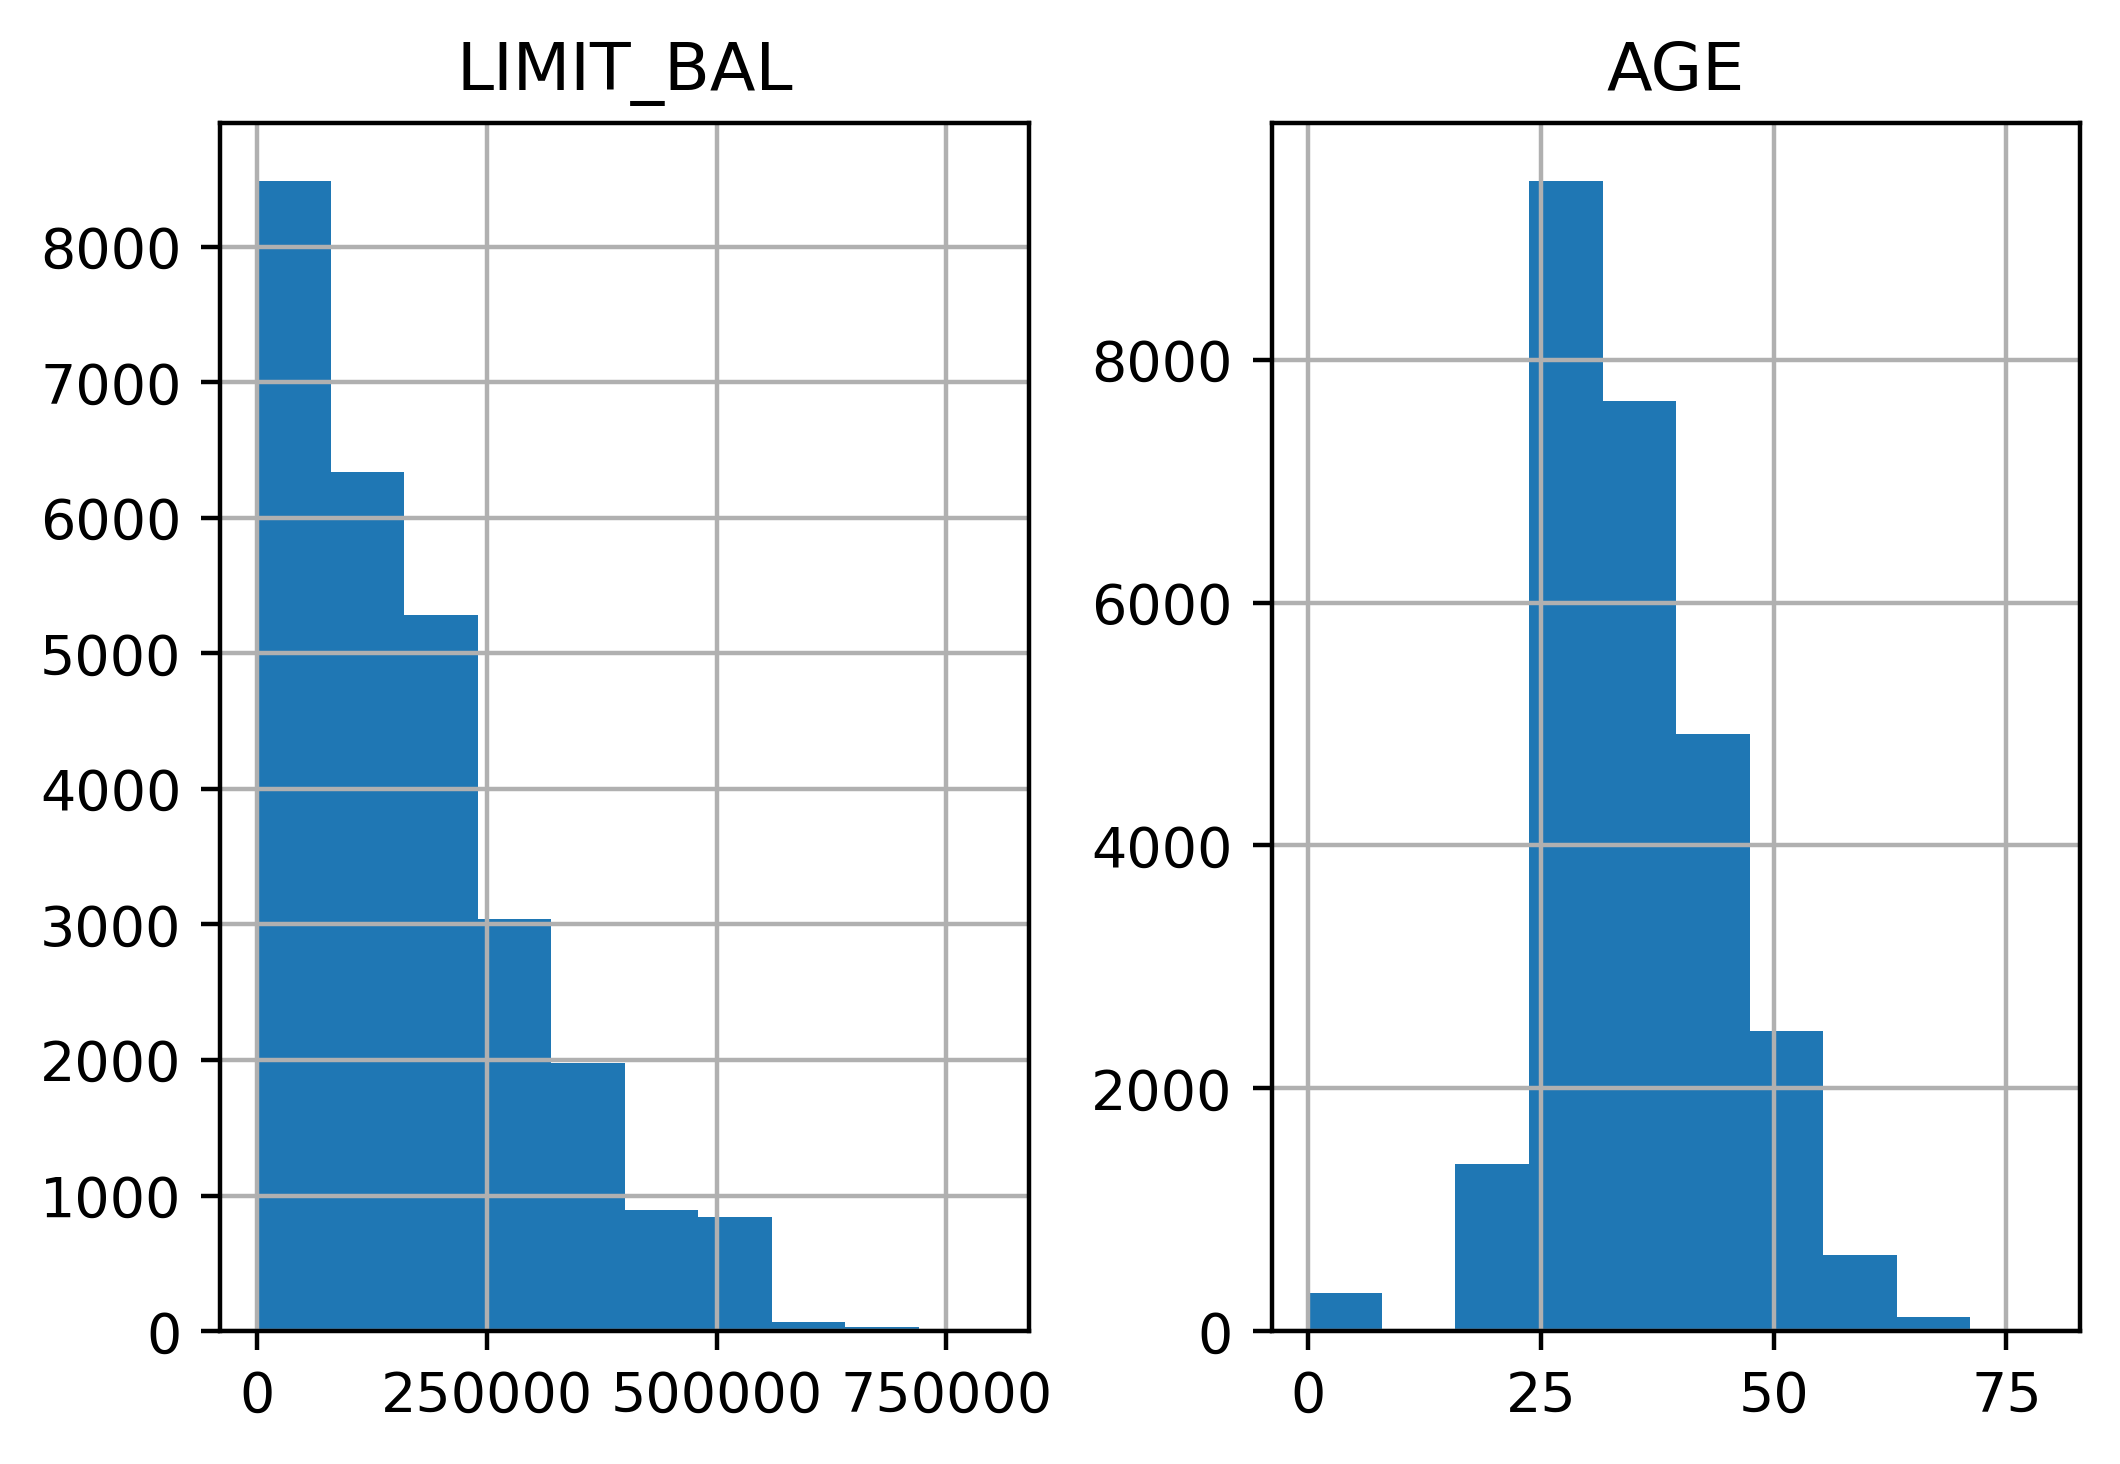

In [27]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [28]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26979.000000,26979.000000
mean,165958.474369,35.090663
std,130333.534550,9.934731
min,0.000000,0.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [29]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
0      326
5      245
4      115
6       43
Name: EDUCATION, dtype: int64

In [30]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      729
Name: EDUCATION, dtype: int64

In [31]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
0      363
3      286
Name: MARRIAGE, dtype: int64

In [32]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      649
Name: MARRIAGE, dtype: int64

Text(0.5, 0, 'Education level: ordinal encoding')

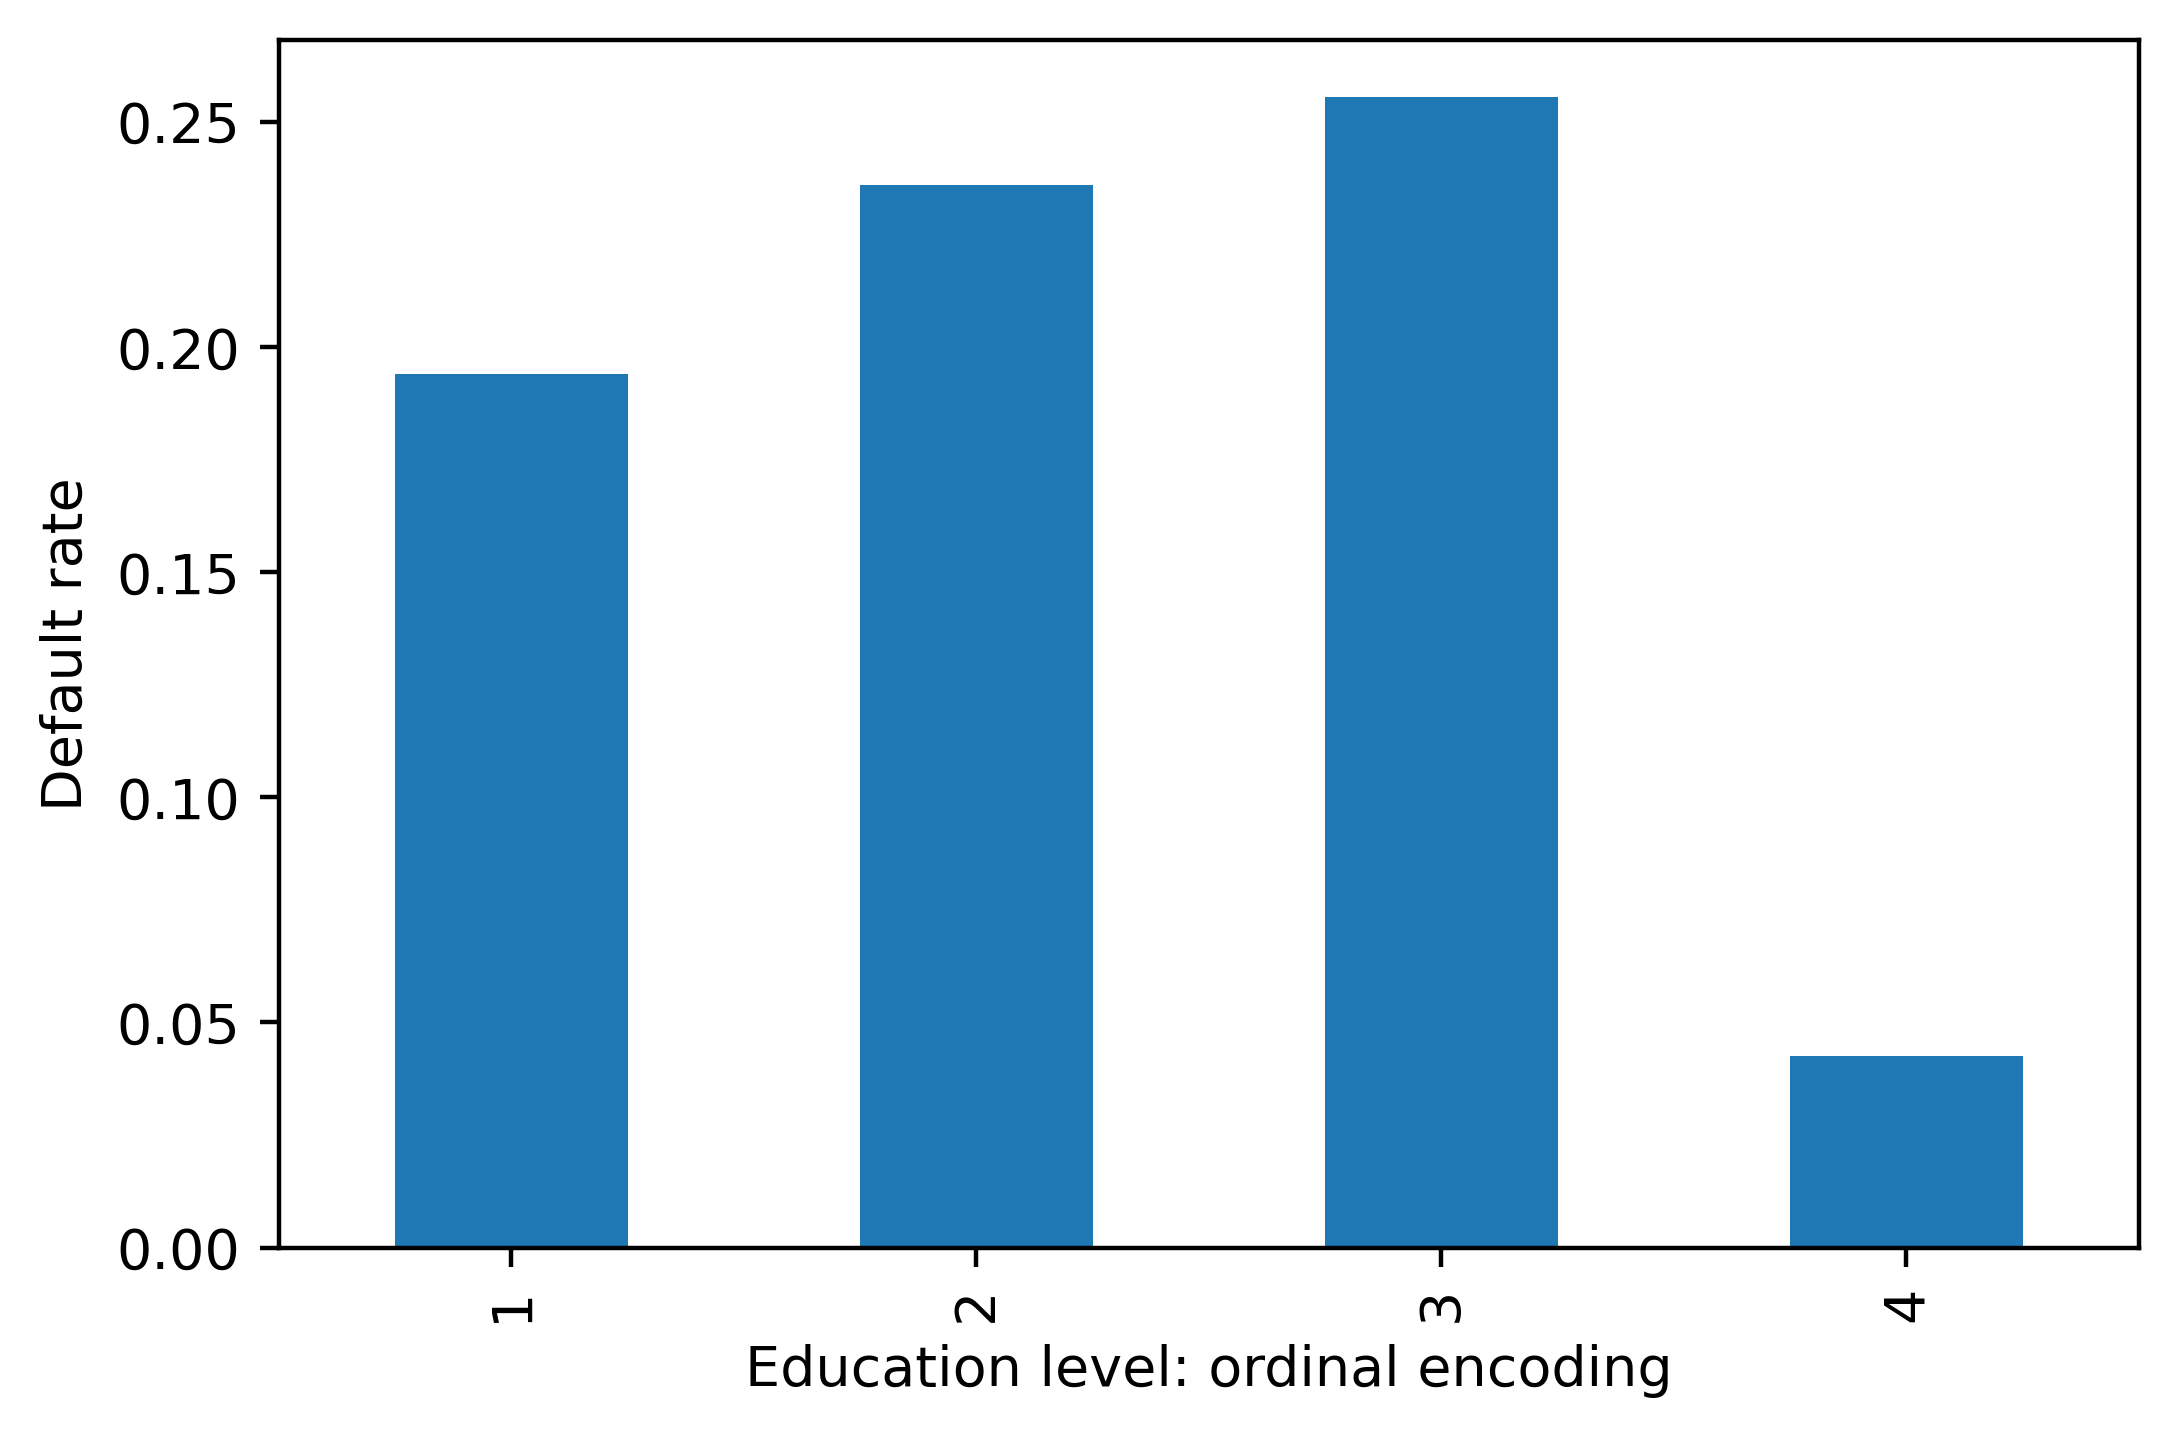

In [33]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

In [34]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [35]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [36]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [37]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [38]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [39]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [40]:
df_with_ohe.to_csv('cleaned_data.csv', index=False)

In [41]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [42]:
df[pay_feats].describe()

,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.132867,-0.164333,-0.219300,-0.263900,-0.288033
std,1.191215,1.191096,1.162348,1.127519,1.144981
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000


In [43]:
df[pay_feats[0]].value_counts().sort_index()

-1                5047
-2                2476
0                13402
1                 3261
2                 2378
3                  292
4                   63
5                   23
6                   11
7                    9
8                   17
Not available     3021
Name: PAY_1, dtype: int64

<AxesSubplot:>

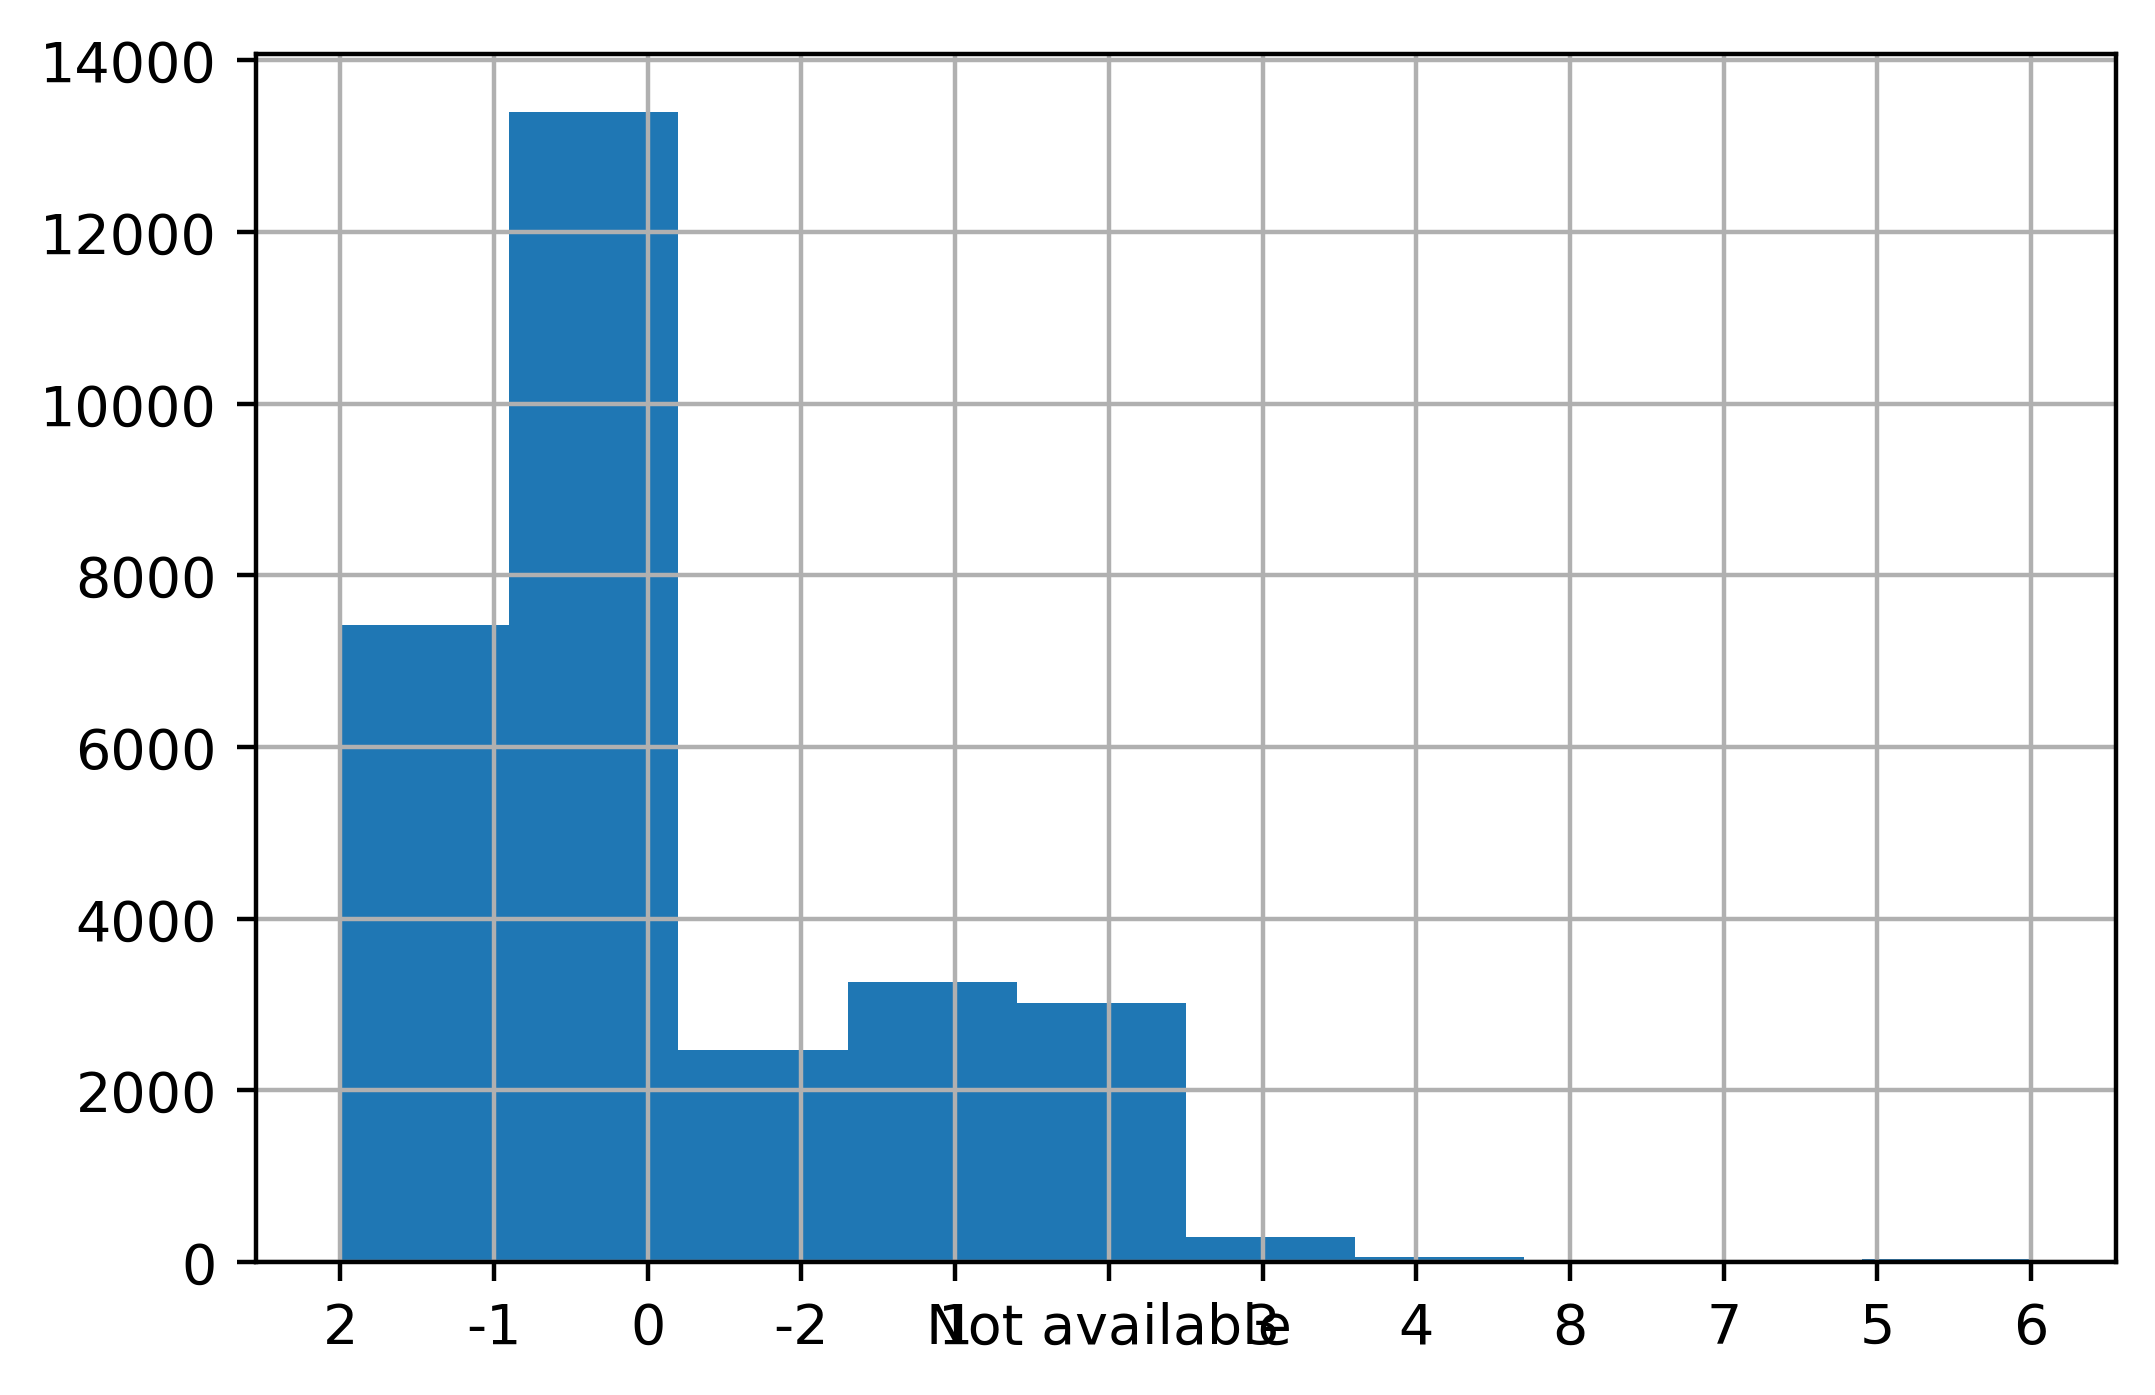

In [44]:
df[pay_feats[0]].hist()

In [45]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

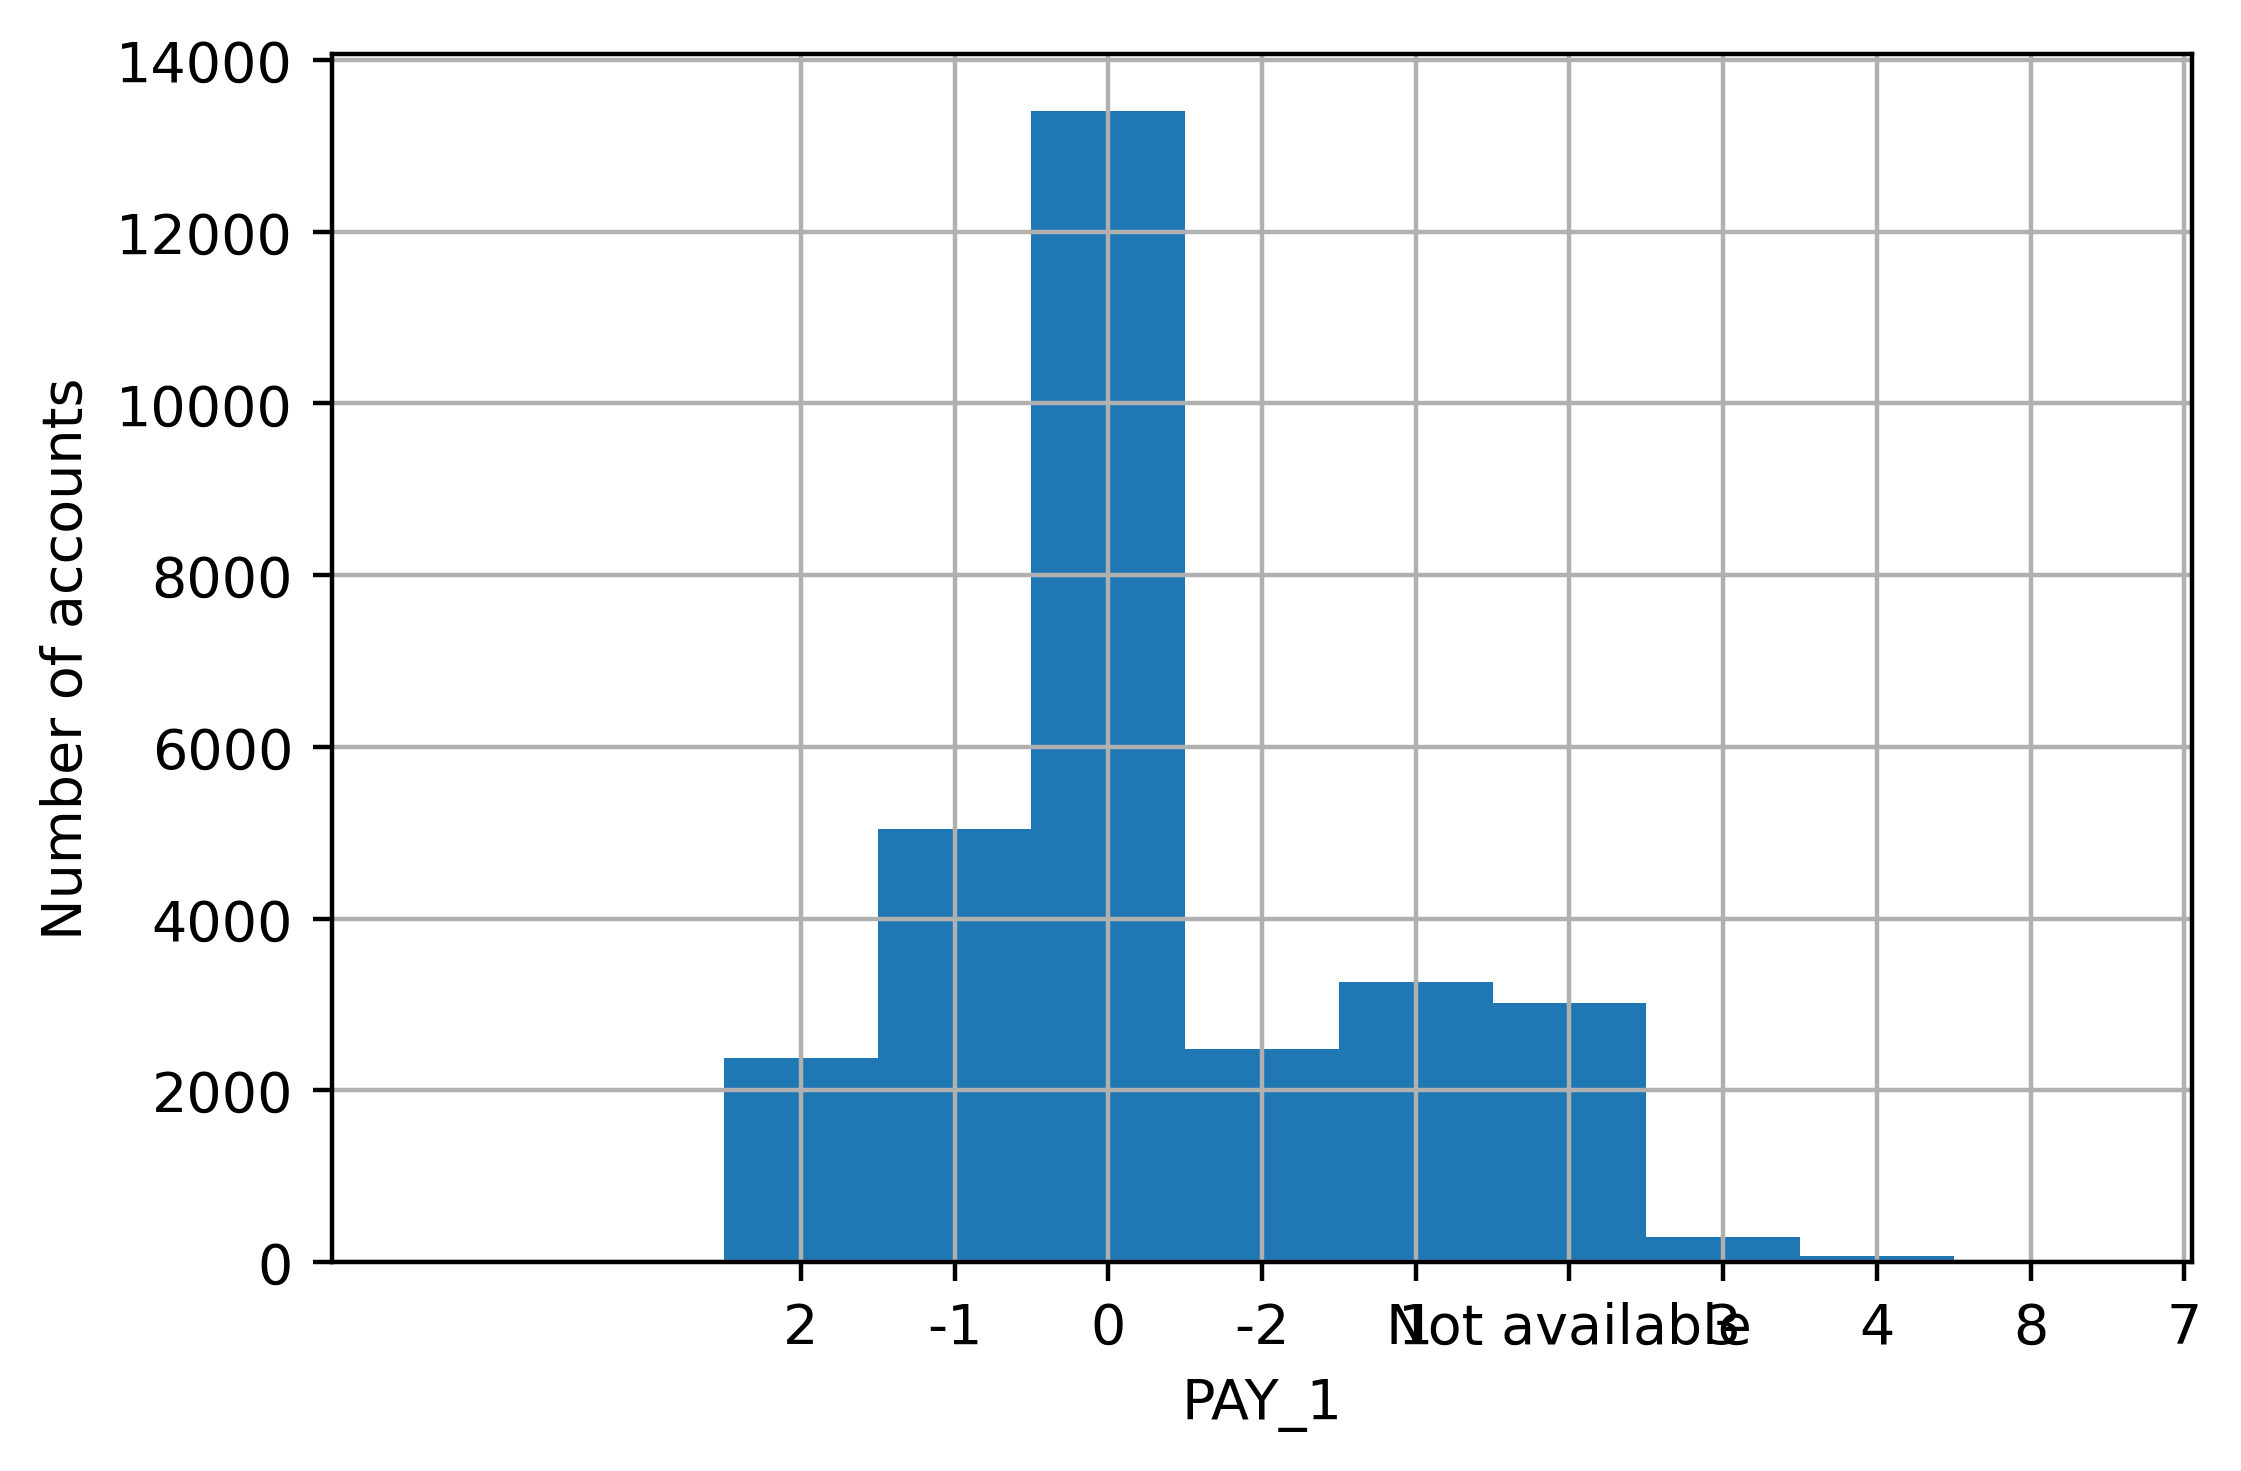

In [46]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>],
       [<AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>, <AxesSubplot:>]],
      dtype=object)

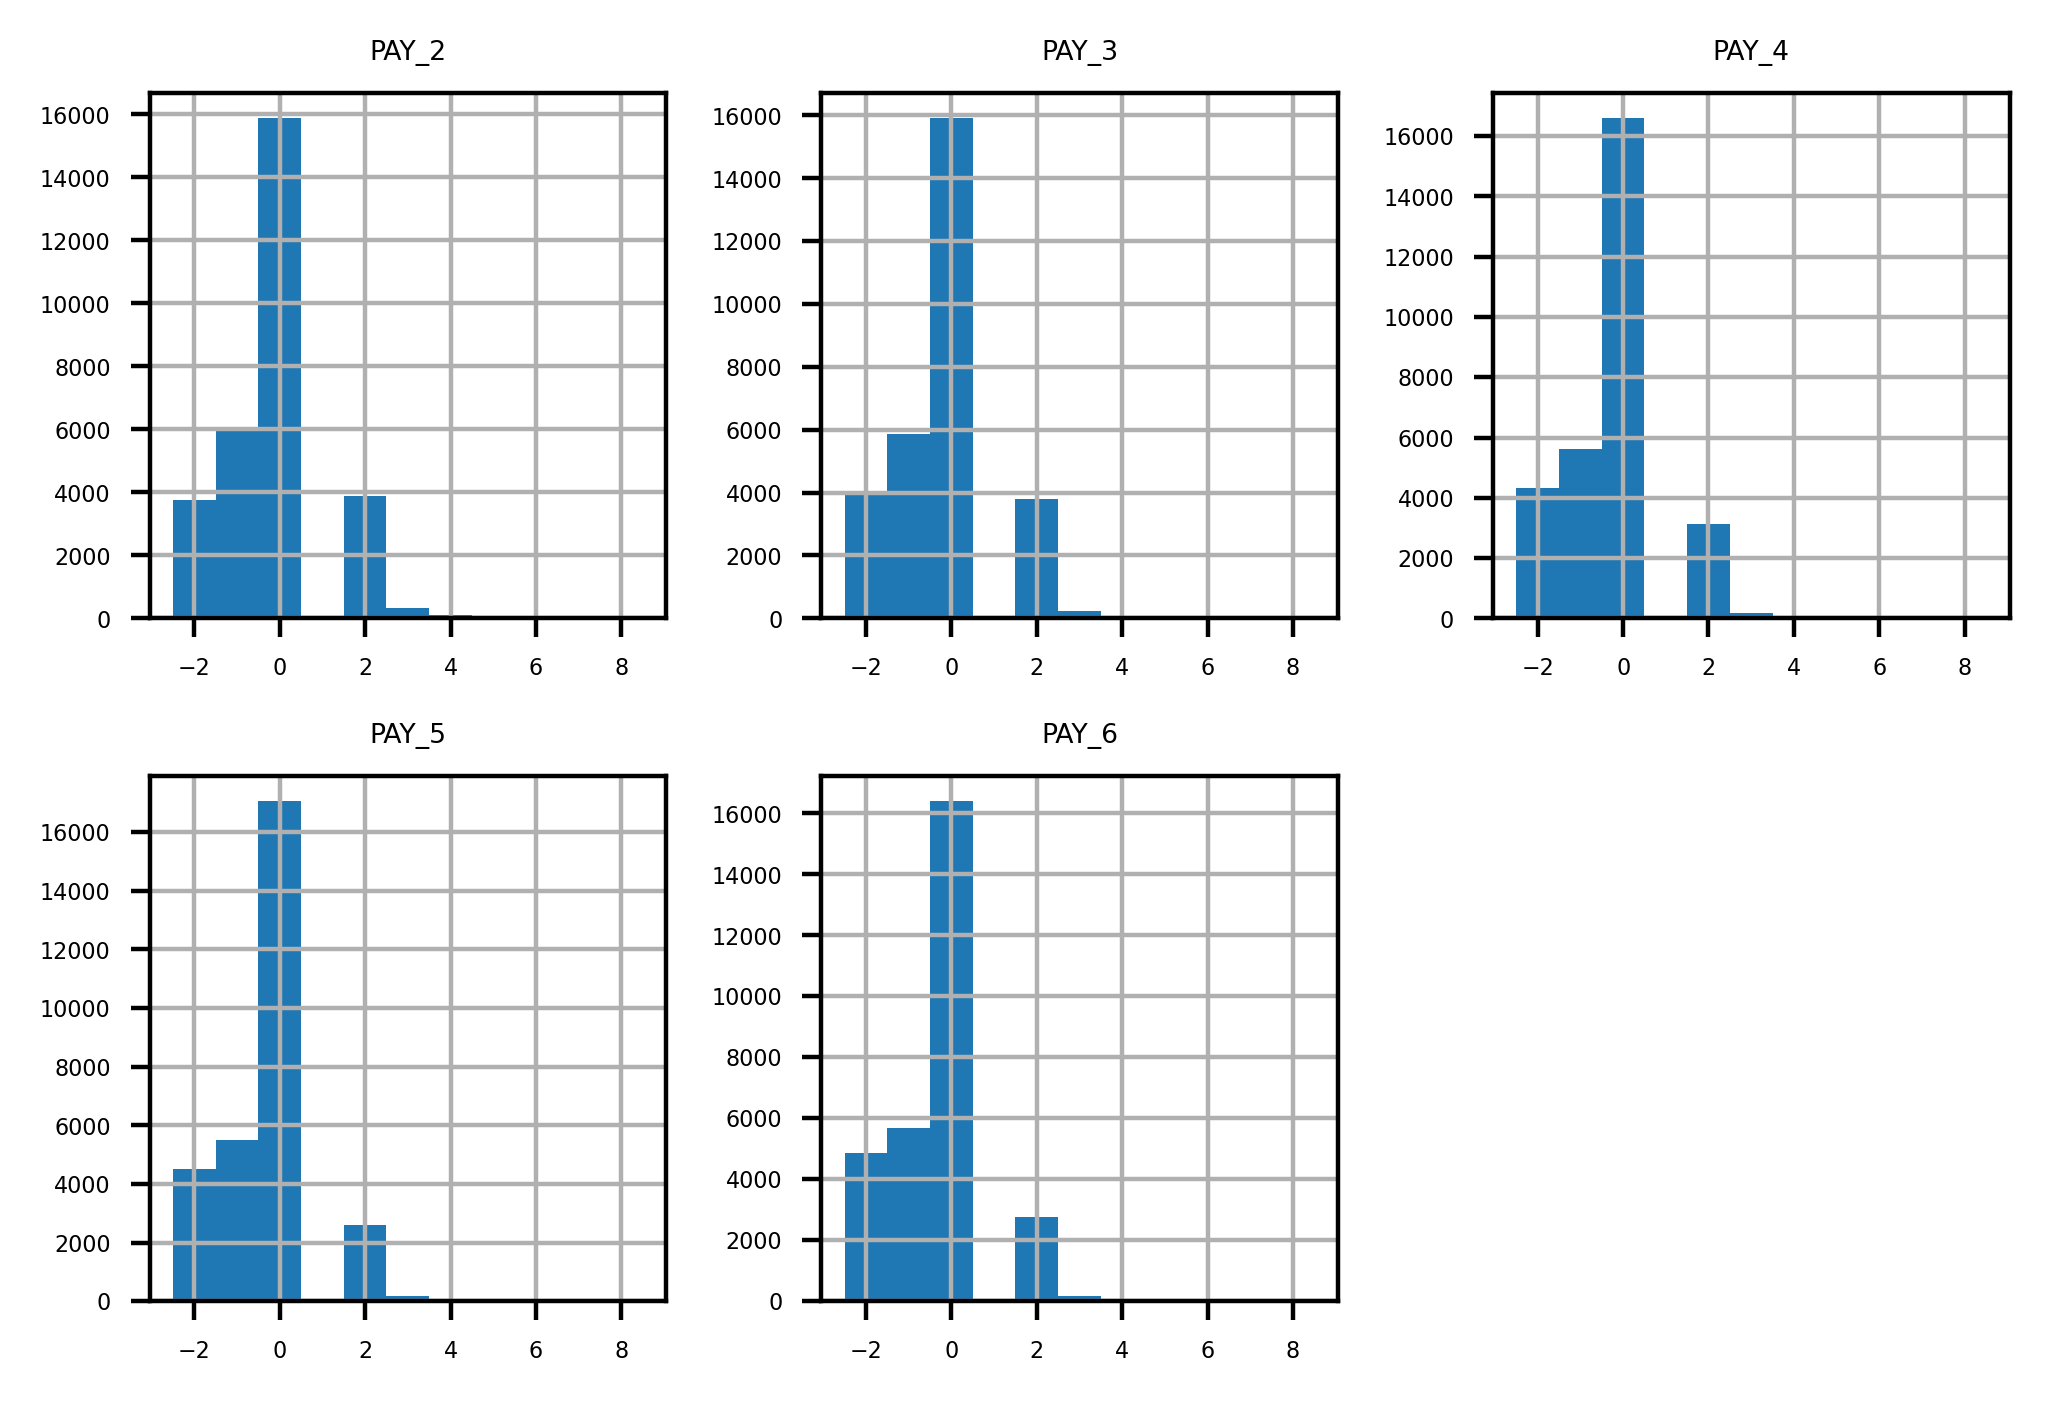

In [47]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [48]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2
